In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


In [2]:
countries=pd.read_csv('Countryclusters.csv')

In [3]:
countries.head(3)

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French


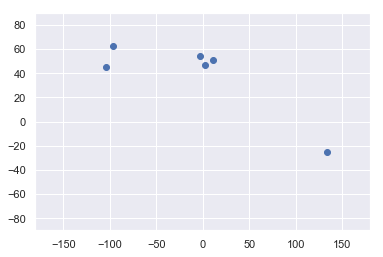

In [4]:
#Let see the data graph
plt.scatter(countries['Longitude'],countries['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Selecting Features

In [5]:
#clustering based on location
x=countries.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [6]:
kmean=KMeans(3)

In [7]:
kmean.fit(x) # applying 3 clusters to data x

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
identified_clusters=kmean.fit_predict(x)
identified_clusters

array([0, 0, 1, 1, 1, 2])

In [9]:
#Let see results in a dataframe
data_with_clusters= countries.copy()
data_with_clusters['cluster']=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


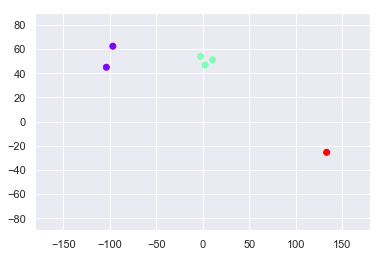

In [10]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Clustering Categorical Data

In [11]:
data=pd.read_csv('Countryclusters.csv')

In [12]:
data.head(3)

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French


In [13]:
data['Language']

0    English
1    English
2     French
3    English
4     German
5    English
Name: Language, dtype: object

In [14]:
df=data.copy()
df['Language']=df['Language'].map({'English':0,'French':1,'German':2})

In [15]:
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [16]:
#Features


In [17]:
z=df.iloc[:,3] # With this Kmeans did not work, it wanted dataframe or arraylike
type(z)

pandas.core.series.Series

In [18]:
z=z.values

In [19]:
cluster=KMeans(2)
cluster.fit(z.reshape(-1,1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
x=df.iloc[:,3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [21]:
type(x)

pandas.core.frame.DataFrame

In [22]:
model=KMeans(3)

In [23]:
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
predcted_cluster=model.fit_predict(x)

In [25]:
#Let see results in a dataframe
data_with_clusters2= df.copy()
data_with_clusters2['clusters']=predcted_cluster
data_with_clusters2

,Country,Latitude,Longitude,Language,clusters
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


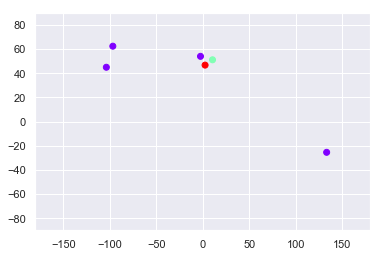

In [26]:
# NOTICE that clusters here are created based on Language feature becuase that is the feature we builded our model with
#Language and geographical location
plt.scatter(data_with_clusters2['Longitude'],data_with_clusters2['Latitude'],c=data_with_clusters2['clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## What about taking the three features and build model?


In [27]:
x=df.iloc[:,1:4]
model=KMeans(3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
predcted_cluster=model.fit_predict(x)

In [29]:
data_with_clusters3= df.copy()
data_with_clusters3['clusters']=predcted_cluster
data_with_clusters3

,Country,Latitude,Longitude,Language,clusters
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,2


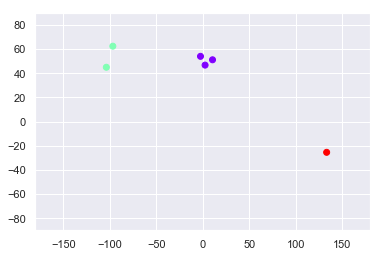

In [30]:
#cluster based only on location !! it always depend on the x we use as input
plt.scatter(data_with_clusters3['Longitude'],data_with_clusters3['Latitude'],c=data_with_clusters3['clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Selcting number of clusters


In [31]:
#To get Within cluster sum square (WCSS):
WCSS=model.inertia_
WCSS

290.10523333333333

In [32]:
#Let find WCSS for 7 clusters as we have 6 observations which would also the max nr of clusters if each 
#observation would be a cluster
wcss=[]
for i in range(1,7):
    kmean=KMeans(i)
    kmean.fit(x)
    wcss_iter=kmean.inertia_
    wcss.append(wcss_iter)
    

In [33]:
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

## The Elbow Method

Text(0, 0.5, 'wcss')

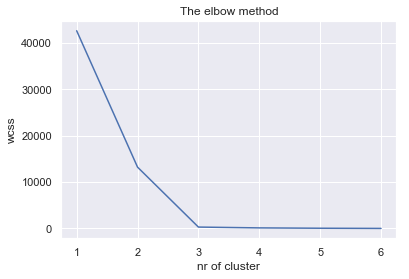

In [34]:
nr_clusters=range(1,7)
plt.plot(nr_clusters,wcss)
plt.title('The elbow method')
plt.xlabel('nr of cluster')
plt.ylabel('wcss')

Three cluster solution is optimal in this case because there is a constant trend of otimization of wcss after that number